# Aircraft Recommendation For Company X 

<img src="images/aicraft.jpg" style="width:900px; height:350px;">


# Overview
This project gives recommendations for a certain company X that is interested in purchasing and operating airplanes for commercial and private enterprises. Analysis of aviation accident data from the the National Transportation Safety Board shows the number of accidents that have happened over the years and the factors surrounding those incidents. The head of the new aviation division can use these findings to help them decide which aircraft to purchase.

# Business Understanding
The company is expanding into new industries to diversify their portfolio specifically the aircraft business. There are a number of risks associated with aircrafts including safety and financial risks and the company leadership currently lacks the expertise to evaluate which aircraft configurations offer the lowest exposure. The objective of this analysis is to identify aircraft models and engine configurations that demonstrate the lowest accident severity and damage outcomes, allowing executives to make confident decisions grounded in real-world data. 

# Data Understanding
The dataset consists of past aircraft accident reports, including key attributes such as aircraft make and model, engine type, number of engines, injury outcomes, and aircraft damage classifications. Numerical fields such as fatal and serious injuries are essential indicators of crash severity, while categorical attributes like engine configuration and aircraft damage provide insight into operational and financial risk. Some fields contain missing or inconsistent data, which are handled selectively dropping records where critical severity metrics are absent, while imputing or grouping less critical missing data where reasonable. Overall, the dataset provides a reliable foundation for identifying low-risk aviation configurations suitable for fleet acquisition.

In [66]:
# import needed libraries
import pandas as pd   # data wrangling
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline

In [67]:
# read csv file to pandas dataframe
main_aviation = pd.read_csv('./data/Aviation_Data.csv', low_memory = False)
# check the first five rows
main_aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [68]:
# check shape of the dataframe
main_aviation.shape

(90348, 31)

In [69]:
# check general information of the dataframe
main_aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [70]:
# check values inlocation dataset
main_aviation['Location'].value_counts()

ANCHORAGE, AK                      434
MIAMI, FL                          200
ALBUQUERQUE, NM                    196
HOUSTON, TX                        193
CHICAGO, IL                        184
                                  ... 
POWELLSVILLE, NC                     1
WOOLSEY, GA                          1
Victoria, Brazil                     1
Mount Disappointment, Australia      1
Gold Coast, Australia                1
Name: Location, Length: 27758, dtype: int64

In [71]:
# subset the dataframe to include only the columns we will need for the analysis
subset_aviation = main_aviation[['Country','Event.Date','Injury.Severity','Aircraft.damage','Aircraft.Category',
                                 'Make','Model','Number.of.Engines','Engine.Type','Purpose.of.flight',
                                 'Weather.Condition','Broad.phase.of.flight','Total.Fatal.Injuries',
                                 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured',]]
# check top rows in dataset
subset_aviation.head()

,Country,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,United States,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,UNK,Cruise,2.0,0.0,0.0,0.0
1,United States,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,UNK,Unknown,4.0,0.0,0.0,0.0
2,United States,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,IMC,Cruise,3.0,NaN,NaN,NaN
3,United States,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,IMC,Cruise,2.0,0.0,0.0,0.0
4,United States,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,VMC,Approach,1.0,2.0,NaN,0.0


In [72]:
# check shape of dataset
subset_aviation.shape

(90348, 16)

In [73]:
# check dataset info
subset_aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 88663 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Aircraft.damage         85695 non-null  object 
 4   Aircraft.Category       32287 non-null  object 
 5   Make                    88826 non-null  object 
 6   Model                   88797 non-null  object 
 7   Number.of.Engines       82805 non-null  float64
 8   Engine.Type             81812 non-null  object 
 9   Purpose.of.flight       82697 non-null  object 
 10  Weather.Condition       84397 non-null  object 
 11  Broad.phase.of.flight   61724 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [74]:
# check unique values in aircraft category
subset_aviation['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [75]:
# subset to only include airplanes
subset_aviation = subset_aviation[subset_aviation['Aircraft.Category'] == 'Airplane']


In [76]:
# checkout top five columns and reset index for the df
subset_aviation.head()
subset_aviation.reset_index(drop=True)

,Country,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,United States,1979-09-17,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,2.0,Turbo Fan,NaN,VMC,Climb,NaN,NaN,1.0,44.0
1,United States,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,Reciprocating,Personal,VMC,Takeoff,0.0,0.0,0.0,2.0
2,United States,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,Reciprocating,Business,IMC,Landing,0.0,0.0,0.0,2.0
3,United States,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,Reciprocating,Personal,IMC,Cruise,0.0,0.0,1.0,0.0
4,United States,1982-01-02,Fatal(1),Destroyed,Airplane,Cessna,R172K,1.0,Reciprocating,Personal,IMC,Takeoff,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27612,United States,2022-12-13,Non-Fatal,Substantial,Airplane,PIPER,PA42,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
27613,United States,2022-12-14,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,1.0,NaN,Personal,VMC,NaN,0.0,0.0,0.0,1.0
27614,United States,2022-12-15,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
27615,United States,2022-12-16,Minor,Substantial,Airplane,CESSNA,R172K,1.0,NaN,Personal,VMC,NaN,0.0,1.0,0.0,0.0


# Data Preparation
In this section I make the data easier to work with by looking at data from different columns and determining the best way to clean it

In [77]:
# edit date info to only have year
subset_aviation = subset_aviation.copy()  # modify without affecting the original df
subset_aviation['Year'] = subset_aviation['Event.Date'].str[:4] # take the year
subset_aviation['Year']

5        1979
7        1982
8        1982
12       1982
13       1982
         ... 
90328    2022
90332    2022
90335    2022
90336    2022
90345    2022
Name: Year, Length: 27617, dtype: object

In [78]:
# check unique values in the year column
subset_aviation['Year'].unique()

array(['1979', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'], dtype=object)

In [79]:
# remove the Event.date column
subset_aviation.drop(columns='Event.Date', inplace=True)

In [80]:
# Convert year column to numeric
subset_aviation['Year'] = pd.to_numeric(subset_aviation['Year'], errors='coerce')

In [81]:
# create filter to select data from the year 2000
subset_aviation = subset_aviation[subset_aviation['Year'] >= 2000]

In [82]:
# check unique values in the year column
subset_aviation['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [83]:
# look at the top rows to confirm changes and reset index
subset_aviation.head()
subset_aviation.reset_index(drop=True)

,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
0,Netherlands,Incident,Minor,Airplane,Boeing,737-3K2,NaN,Unknown,Unknown,UNK,NaN,NaN,NaN,NaN,143.0,2000
1,United States,Non-Fatal,Substantial,Airplane,Myers,Q-2,1.0,Reciprocating,Personal,VMC,Takeoff,NaN,NaN,1.0,NaN,2000
2,Cote D'ivoire,Fatal(169),Destroyed,Airplane,Airbus Industrie,A 310,NaN,Unknown,Unknown,UNK,NaN,169.0,NaN,10.0,NaN,2000
3,Angola,Non-Fatal,Destroyed,Airplane,Boeing,B 727-100,NaN,Unknown,Unknown,IMC,NaN,NaN,NaN,NaN,7.0,2000
4,United States,Fatal(1),Substantial,Airplane,Cessna,208B,1.0,Turbo Prop,Unknown,VMC,Maneuvering,1.0,NaN,NaN,1.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24159,United States,Non-Fatal,Substantial,Airplane,PIPER,PA42,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,2022
24160,United States,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,1.0,NaN,Personal,VMC,NaN,0.0,0.0,0.0,1.0,2022
24161,United States,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,2022
24162,United States,Minor,Substantial,Airplane,CESSNA,R172K,1.0,NaN,Personal,VMC,NaN,0.0,1.0,0.0,0.0,2022


In [84]:
# combine the make and model columns
subset_aviation['Make-Model'] = subset_aviation[['Make','Model']].fillna('').agg(' '.join, axis=1)
subset_aviation['Make-Model']

47682                      Boeing 737-3K2
47743                           Myers Q-2
47779              Airbus Industrie A 310
47845                    Boeing B 727-100
47864                         Cessna 208B
                       ...               
90328                          PIPER PA42
90332             CIRRUS DESIGN CORP SR22
90335                  SWEARINGEN SA226TC
90336                        CESSNA R172K
90345    AMERICAN CHAMPION AIRCRAFT 8GCBC
Name: Make-Model, Length: 24164, dtype: object

In [85]:
# drop the make and model columns
subset_aviation.drop(columns=['Make','Model'],inplace=True)

In [86]:
# check that changes were made
# reset index
subset_aviation.head()
subset_aviation.reset_index(drop=True)

,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Make-Model
0,Netherlands,Incident,Minor,Airplane,NaN,Unknown,Unknown,UNK,NaN,NaN,NaN,NaN,143.0,2000,Boeing 737-3K2
1,United States,Non-Fatal,Substantial,Airplane,1.0,Reciprocating,Personal,VMC,Takeoff,NaN,NaN,1.0,NaN,2000,Myers Q-2
2,Cote D'ivoire,Fatal(169),Destroyed,Airplane,NaN,Unknown,Unknown,UNK,NaN,169.0,NaN,10.0,NaN,2000,Airbus Industrie A 310
3,Angola,Non-Fatal,Destroyed,Airplane,NaN,Unknown,Unknown,IMC,NaN,NaN,NaN,NaN,7.0,2000,Boeing B 727-100
4,United States,Fatal(1),Substantial,Airplane,1.0,Turbo Prop,Unknown,VMC,Maneuvering,1.0,NaN,NaN,1.0,2000,Cessna 208B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24159,United States,Non-Fatal,Substantial,Airplane,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,2022,PIPER PA42
24160,United States,Non-Fatal,Substantial,Airplane,1.0,NaN,Personal,VMC,NaN,0.0,0.0,0.0,1.0,2022,CIRRUS DESIGN CORP SR22
24161,United States,Non-Fatal,Substantial,Airplane,2.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,2022,SWEARINGEN SA226TC
24162,United States,Minor,Substantial,Airplane,1.0,NaN,Personal,VMC,NaN,0.0,1.0,0.0,0.0,2022,CESSNA R172K


In [87]:
subset_aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24164 entries, 47682 to 90345
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 24163 non-null  object 
 1   Injury.Severity         23350 non-null  object 
 2   Aircraft.damage         22964 non-null  object 
 3   Aircraft.Category       24164 non-null  object 
 4   Number.of.Engines       21517 non-null  float64
 5   Engine.Type             19941 non-null  object 
 6   Purpose.of.flight       20441 non-null  object 
 7   Weather.Condition       21114 non-null  object 
 8   Broad.phase.of.flight   3076 non-null   object 
 9   Total.Fatal.Injuries    21184 non-null  float64
 10  Total.Serious.Injuries  21195 non-null  float64
 11  Total.Minor.Injuries    21536 non-null  float64
 12  Total.Uninjured         23404 non-null  float64
 13  Year                    24164 non-null  int64  
 14  Make-Model              24164 non-

In [88]:
# rename columns
subset_aviation.rename(columns={'Injury.Severity':'injury_severity','Aircraft.damage':'aircraft_damage',
                                'Aircraft.Category':'aircraft_category','Number.of.Engines':'number_of_engines',
                                'Engine.Type':'engine_type','Purpose.of.flight':'flight_purpose','Weather.Condition':'weather_condition',
                                'Broad.phase.of.flight':'phase_of_flight','Total.Serious.Injuries':'serious_injuries','Total.Fatal.Injuries':'fatal_injuries',
                                'Total.Minor.Injuries':'minor_injuries','Total.Uninjured':'uninjured','Make-Model':'make_model'},
                                inplace=True
)

In [89]:
# check the renamed columns
subset_aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24164 entries, 47682 to 90345
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            24163 non-null  object 
 1   injury_severity    23350 non-null  object 
 2   aircraft_damage    22964 non-null  object 
 3   aircraft_category  24164 non-null  object 
 4   number_of_engines  21517 non-null  float64
 5   engine_type        19941 non-null  object 
 6   flight_purpose     20441 non-null  object 
 7   weather_condition  21114 non-null  object 
 8   phase_of_flight    3076 non-null   object 
 9   fatal_injuries     21184 non-null  float64
 10  serious_injuries   21195 non-null  float64
 11  minor_injuries     21536 non-null  float64
 12  uninjured          23404 non-null  float64
 13  Year               24164 non-null  int64  
 14  make_model         24164 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 2.9+ MB


In [90]:
# look at the available matplotlib styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [91]:
# choose a style from the available styles
plt.style.use('seaborn-darkgrid')

In [92]:
# fatal injuries by make_model
df_fatal = subset_aviation[['make_model', 'fatal_injuries']]
# group both columns and calculate mean fatalities
fatal = subset_aviation.groupby('make_model')['fatal_injuries'].mean() 
# sort_values in descending order
fatal = fatal.sort_values(ascending=False)
# limit to the top 10 values
fatal = fatal.head(10)

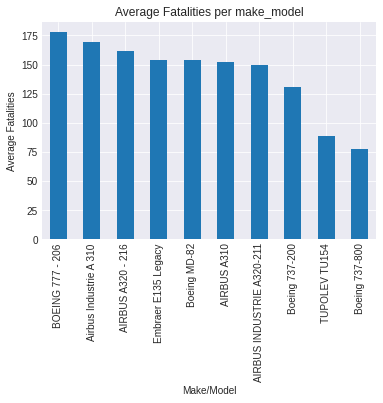

In [93]:
# create bar plot 
fatal.plot(kind='bar')
# set the title of plot
plt.title('Average Fatalities per make_model')
# set the x axis label
plt.xlabel('Make/Model')
# set the y axis label
plt.ylabel('Average Fatalities')
# show the plot
plt.show()

# Data Cleaning
In this section of the notebook, I check for missing, extraneous and erroneous values in the dataframe and depending on the information contained in that particular row or column I either drop or impute with reasonable entries.
For example due to the fact that the country column as you will see below has only one nan value, we will drop that value.

In [94]:
# check missing values in the Dataframe
subset_aviation.isna()


,Country,injury_severity,aircraft_damage,aircraft_category,number_of_engines,engine_type,flight_purpose,weather_condition,phase_of_flight,fatal_injuries,serious_injuries,minor_injuries,uninjured,Year,make_model
47682,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False
47743,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False
47779,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False
47845,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False
47864,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False
90332,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
90335,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False
90336,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


In [95]:
# check sum of null values
subset_aviation.isnull().sum()

Country                  1
injury_severity        814
aircraft_damage       1200
aircraft_category        0
number_of_engines     2647
engine_type           4223
flight_purpose        3723
weather_condition     3050
phase_of_flight      21088
fatal_injuries        2980
serious_injuries      2969
minor_injuries        2628
uninjured              760
Year                     0
make_model               0
dtype: int64

In [96]:
# look at the number of duplicates
subset_aviation.duplicated().value_counts()

False    22039
True      2125
dtype: int64

In [97]:
# drop duplicates
subset_aviation = subset_aviation.drop_duplicates() 
subset_aviation.shape

(22039, 15)

In [98]:
# look at summary statistics
subset_aviation.describe()

,number_of_engines,fatal_injuries,serious_injuries,minor_injuries,uninjured,Year
count,19437.000000,19288.000000,19299.000000,19635.000000,21284.000000,22039.000000
mean,1.168339,0.707590,0.330898,0.256277,7.047360,2013.417623
std,0.416845,6.236498,2.305024,2.858095,33.384416,5.231505
min,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2013.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2018.000000
max,8.000000,295.000000,161.000000,380.000000,576.000000,2022.000000


## Drop Missing Values in Country and Engine Type Columns
- The Country and Engine Type columns have some missing values.
- The safest way to deal with them is to drop them.
- Considering the fact that  they are unique features it will be considered a best practice to drop the null values rather than impute with guessedvalues that may affect the recommendations significatly.


In [99]:
# check unique values in country column
subset_aviation['Country'].unique()

array(['Netherlands', 'United States', "Cote D'ivoire", 'Angola',
       'Brazil', 'Peru', 'Saudi Arabia', 'Ecuador',
       'Federated States Of Micronesia', 'Australia', 'Philippines',
       'Italy', 'Uganda', 'Norway', 'Ireland', 'Gabon', 'France',
       'Germany', 'United Kingdom', nan, 'Colombia', 'Canada',
       'Argentina', 'Niger', 'Denmark', 'Panama', 'Venezuela',
       'Dominican Republic', 'Romania', 'Guadeloupe', 'Iceland',
       'Guatemala', 'Mexico', 'Bolivia', 'Bahamas', 'Honduras',
       'El Salvador', 'Japan', 'Costa Rica', 'Uruguay', 'Chile',
       'Bangladesh', 'Turkey', 'China', 'Russia', 'United Arab Emirates',
       'Nicaragua', 'Hungary', 'Spain', 'Switzerland', 'Malawi',
       'Unknown', 'Namibia', 'Austria', 'Antarctica', 'Thailand', 'Egypt',
       'Jamaica', 'Finland', 'Indonesia', 'Portugal', 'Pakistan',
       'Central Africa', 'Senegal', 'South Sudan', 'Saint Barthelemy',
       'Micronesia', 'Belgium', 'Kenya', 'Estonia', 'Nigeria', 'Croatia',
  

In [100]:
# check unique values in engine type column
subset_aviation['engine_type'].unique()

array(['Unknown', 'Reciprocating', 'Turbo Prop', 'Turbo Fan', nan,
       'Turbo Jet', 'Turbo Shaft', 'Electric', 'Geared Turbofan', 'UNK'],
      dtype=object)

In [101]:
# drop null in country,engine_type, and aircraft category columns
subset_aviation.dropna(subset=['Country','engine_type'],inplace=True)

In [102]:
# check that country column no longer has missing values
subset_aviation.isnull().sum()

Country                  0
injury_severity        163
aircraft_damage        517
aircraft_category        0
number_of_engines      563
engine_type              0
flight_purpose        1536
weather_condition      686
phase_of_flight      15084
fatal_injuries        2672
serious_injuries      2605
minor_injuries        2263
uninjured              657
Year                     0
make_model               0
dtype: int64

- For the injury_severity column, I filled missing values with "Unknown" instead of deleting them. If I removed those rows, I would lose valid accident records where the severity just wasn’t recorded. 
- For the minor_injuries and uninjured columns, I replaced missing values with 0, because these fields are usually left blank when nobody was hurt. 
- For fatal_injuries and serious_injuries, I removed rows with missing values completely. I did not want to assume “0 deaths” when it was not confirmed. 
- Lastly, I filled missing values in the number_of_engines column using the most common engine count in the dataset. Using an average like 1.7 engines would not make sense since aircraft only have whole numbers of engines.


In [103]:
# check out unique values in injury severity colum
subset_aviation['injury_severity'].unique()

array(['Incident', 'Non-Fatal', 'Fatal(169)', 'Fatal(1)', 'Fatal(3)',
       'Unavailable', 'Fatal(131)', 'Fatal(12)', 'Fatal(13)', 'Fatal(4)',
       'Fatal(2)', 'Fatal(8)', 'Fatal(24)', 'Fatal(65)', 'Fatal(7)',
       'Fatal(5)', 'Fatal(113)', 'Fatal(6)', 'Fatal(10)', 'Fatal', nan,
       'Minor', 'Serious'], dtype=object)

In [104]:
# check out the mode of no. of engines column
subset_aviation['number_of_engines'].mode()

0    1.0
dtype: float64

In [105]:
# fill null values injury severity with unknown
subset_aviation['injury_severity'] = subset_aviation['injury_severity'].fillna('Unknown')
# drop null values in the fatal and serious injuries column
subset_aviation.dropna(subset=['fatal_injuries','serious_injuries'],inplace=True)
# fill minor injuries and uninjured with 0
subset_aviation['minor_injuries'] = subset_aviation['minor_injuries'].fillna(0)
subset_aviation['uninjured'] = subset_aviation['uninjured'].fillna(0)
# impute number of engines with mode
subset_aviation['number_of_engines'] = subset_aviation['number_of_engines'].fillna(subset_aviation['number_of_engines'].mode()[0])

In [106]:
# check sum of null values again to confirm that the above columns have no null values
subset_aviation.isnull().sum()

Country                  0
injury_severity          0
aircraft_damage        479
aircraft_category        0
number_of_engines        0
engine_type              0
flight_purpose        1407
weather_condition      663
phase_of_flight      15029
fatal_injuries           0
serious_injuries         0
minor_injuries           0
uninjured                0
Year                     0
make_model               0
dtype: int64

- For flight_purpose, weather_condition, and aircraft_damage, I replaced missing values with "Unknown". These fields describe the context of the accident rather than numeric values, so it's better to label them as unknown instead of deleting the records. Removing those rows would throw away full accident cases just because a single detail wasn’t logged.

- However, I dropped the phase_of_flight column completely because it was missing too much data. With that many blanks, any attempt to fill it would be a guess rather than a correction. Keeping it would add noise instead of insight.

In [107]:
# fill flight purpose with unknown
subset_aviation['flight_purpose'] = subset_aviation['flight_purpose'].fillna('Unknown')
# fill weather condition with unknown
subset_aviation['weather_condition'] = subset_aviation['weather_condition'].fillna('Unknown')
# fill aircraft damage with unknown
subset_aviation['aircraft_damage'] = subset_aviation['aircraft_damage'].fillna('Unknown')
# drop phase_of_flight column it has too many missing values
subset_aviation.drop(columns=['phase_of_flight'],inplace=True)

In [108]:
# check that all missing values are  now dealt with
subset_aviation.isnull().sum()

Country              0
injury_severity      0
aircraft_damage      0
aircraft_category    0
number_of_engines    0
engine_type          0
flight_purpose       0
weather_condition    0
fatal_injuries       0
serious_injuries     0
minor_injuries       0
uninjured            0
Year                 0
make_model           0
dtype: int64

In [109]:
subset_aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15134 entries, 50344 to 90226
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            15134 non-null  object 
 1   injury_severity    15134 non-null  object 
 2   aircraft_damage    15134 non-null  object 
 3   aircraft_category  15134 non-null  object 
 4   number_of_engines  15134 non-null  float64
 5   engine_type        15134 non-null  object 
 6   flight_purpose     15134 non-null  object 
 7   weather_condition  15134 non-null  object 
 8   fatal_injuries     15134 non-null  float64
 9   serious_injuries   15134 non-null  float64
 10  minor_injuries     15134 non-null  float64
 11  uninjured          15134 non-null  float64
 12  Year               15134 non-null  int64  
 13  make_model         15134 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.7+ MB


In [110]:
subset_aviation.head()
subset_aviation.reset_index(drop=True)

,Country,injury_severity,aircraft_damage,aircraft_category,number_of_engines,engine_type,flight_purpose,weather_condition,fatal_injuries,serious_injuries,minor_injuries,uninjured,Year,make_model
0,United States,Fatal(1),Substantial,Airplane,1.0,Reciprocating,Personal,VMC,1.0,1.0,0.0,0.0,2001,Henry Pelican
1,France,Fatal(3),Destroyed,Airplane,1.0,Reciprocating,Unknown,Unknown,3.0,0.0,0.0,0.0,2001,Mooney M20E
2,United States,Fatal(1),Substantial,Airplane,1.0,Reciprocating,Personal,VMC,1.0,0.0,0.0,0.0,2001,Piper PA-28-181
3,United States,Fatal(1),Destroyed,Airplane,1.0,Reciprocating,Personal,VMC,1.0,1.0,0.0,0.0,2001,Moravan Zlin 526F
4,United States,Fatal(2),Substantial,Airplane,1.0,Reciprocating,Unknown,VMC,2.0,2.0,0.0,0.0,2002,Cessna A185F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15129,United States,Non-Fatal,Substantial,Airplane,1.0,Reciprocating,Personal,VMC,0.0,0.0,0.0,1.0,2022,WASZAK ARTHUR B WITTMAN TAILWIND W10
15130,United States,Non-Fatal,Substantial,Airplane,1.0,Reciprocating,Personal,VMC,0.0,0.0,0.0,2.0,2022,CESSNA 177RG
15131,United States,Non-Fatal,Substantial,Airplane,2.0,Reciprocating,Personal,VMC,0.0,0.0,0.0,1.0,2022,BEECH B-60
15132,United States,Minor,Substantial,Airplane,1.0,Reciprocating,ASHO,VMC,0.0,1.0,0.0,0.0,2022,STEPHEN J HOFFMAN MS-500


# Data Analysis
In this section, I analyze the cleaned dataset to generate actionable insights for Company X’s decision-makers. The data has been filtered, sorted, grouped, and aggregated to address key business questions. All visualizations that follow are directly aligned with the final recommendations.

In [111]:
# create a new csv file from the subset data
subset_aviation.to_csv('subset_aviation.csv', index=False)

In [112]:
subset_aviation.duplicated().sum()

22

In [113]:
subset_aviation = subset_aviation.drop_duplicates()

In [114]:
# Function to drop or relabel "Unknown", "UNK", NaN, etc.
def clean_unknown(series):
    return series.replace(['Unknown','unknown kit', 'UNK', 'unknown', 'Other','NONE','none','None'], pd.NA).dropna()

# Make/Model Recommendation based on Average Fatalities
To determine the safest aircraft options, each make/model was evaluated by its average number of fatalities per accident. This focuses on severity rather than frequency, helping identify aircraft that tend to protect occupants even when accidents occur. Models with consistently low or zero average fatalities are considered the best candidates for purchase.

In [115]:
# Make/model recommendation
subset_aviation['make_model'] = clean_unknown(subset_aviation['make_model'])
safest_make_model = (
    subset_aviation.groupby('make_model')['fatal_injuries']
    .mean()
    .sort_values()
    .head(10)

)

print("Top 10 Safest Aircraft Models (Lowest Avg Fatal Injuries):")
print(safest_make_model.head(10))


Top 10 Safest Aircraft Models (Lowest Avg Fatal Injuries):
make_model
HELIO H-250                          0.0
MAULE M 7-235                        0.0
MAULE M 7                            0.0
MAULE M 6-235                        0.0
MAULE M 6                            0.0
MAULE M 5-235C                       0.0
MAULE M 4-220C                       0.0
MAULE M 4                            0.0
MATTHEWS H THOMAS JODEL   F11 A      0.0
MATHIS MELVIN R BUSHBY MUSTANG II    0.0
Name: fatal_injuries, dtype: float64


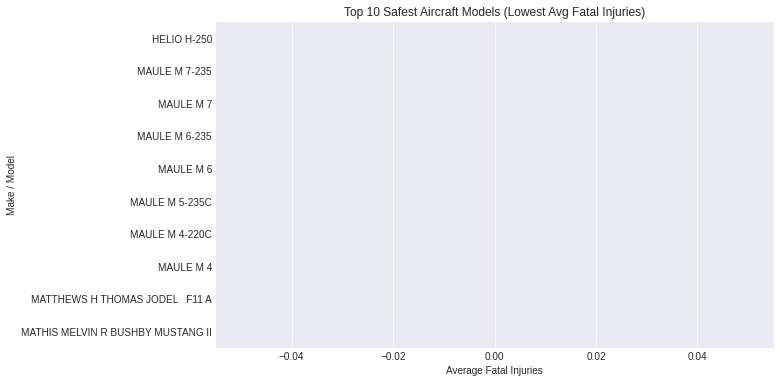

In [116]:
# bar graph for safest make/models with few/no fatal injuries
plt.figure(figsize=(10,6))
sns.barplot(x=safest_make_model.values, y=safest_make_model.index)
plt.title("Top 10 Safest Aircraft Models (Lowest Avg Fatal Injuries)")
plt.xlabel("Average Fatal Injuries")
plt.ylabel("Make / Model")
plt.show()

# Safest Engine Type Recommendation based on Average Fatalities
Engine types were compared by their average fatality count per accident to identify which configurations offer the greatest safety. Rather than looking at accident frequency alone, this approach highlights engine types that minimize injury severity when failures occur. Engine types with consistently low or zero average fatalities are recommended for consideration.

In [117]:
# safest engine type for airplane recommendation
engine_safety = (
    subset_aviation.groupby('engine_type', as_index=False)['fatal_injuries']
      .mean()
      .sort_values(by='fatal_injuries')
)

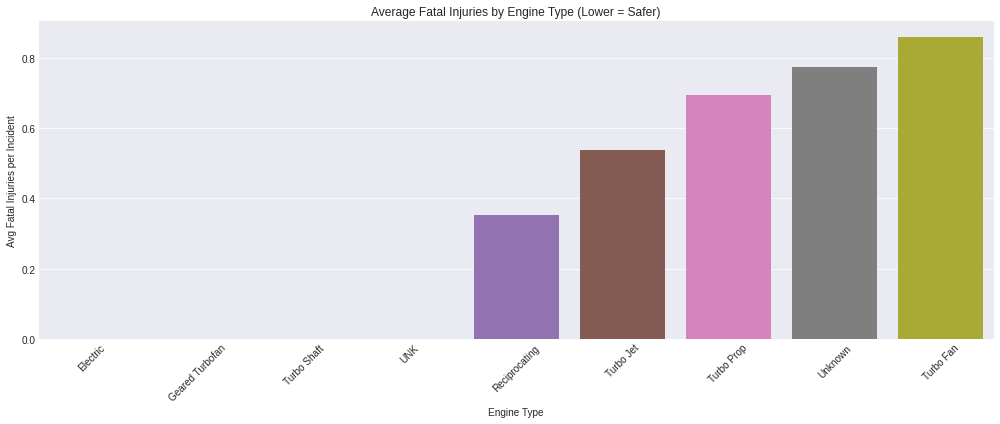

In [118]:
# saffest engine bar plot
plt.figure(figsize=(14,6))
sns.barplot(data=engine_safety, x='engine_type', y='fatal_injuries')
plt.title("Average Fatal Injuries by Engine Type (Lower = Safer)")
plt.ylabel("Avg Fatal Injuries per Incident")
plt.xlabel("Engine Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [119]:
subset_aviation['flight_purpose'].unique()

array(['Personal', 'Unknown', 'Skydiving', 'Aerial Application',
       'Instructional', 'Business', 'Executive/corporate', 'Positioning',
       'Glider Tow', 'Flight Test', 'Other Work Use', 'Banner Tow',
       'Ferry', 'Public Aircraft', 'Aerial Observation', 'Air Race show',
       'Public Aircraft - Federal', 'Firefighting',
       'Public Aircraft - State', 'Public Aircraft - Local', 'Air Drop',
       'PUBS', 'ASHO'], dtype=object)

# Risk Assessment by Flight Purpose (Commercial vs Private Operations)

Since Company X plans to operate both commercial and private flights, it is important to understand how risk levels vary between different flight purposes. Rather than choosing which purpose to pursue, this analysis helps determine **where stricter safety protocols, pilot training, or more reliable aircraft types may be required.**

Accident severity is evaluated using **average fatal and serious injuries per incident** for each flight purpose. Flight purposes with higher average injury rates indicate operations that may demand **additional safety investments or more conservative fleet selection.**


In [120]:
# injury severity with fatal and serious injuries
subset_aviation['total_severity'] = subset_aviation['fatal_injuries'] + subset_aviation['serious_injuries']

# group by flight purpose and calculate average severity
severity_by_purpose = subset_aviation.groupby('flight_purpose')['total_severity'].mean().reset_index()

# Sort for clarity
severity_by_purpose = severity_by_purpose.sort_values(by='total_severity')

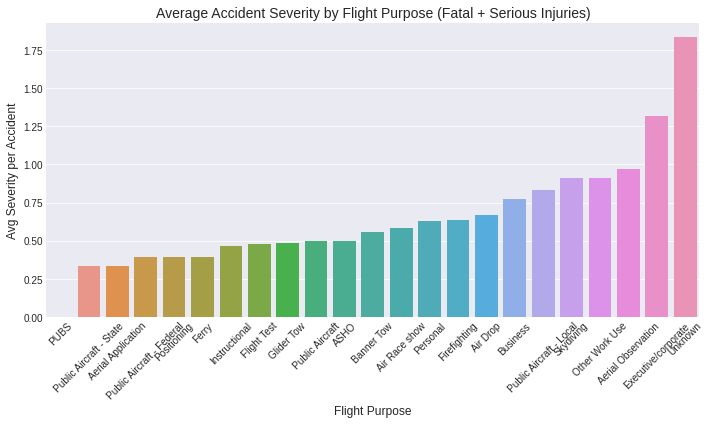

In [121]:
# visualization
plt.figure(figsize=(10,6))
sns.barplot(
    data=severity_by_purpose,
    x='flight_purpose',
    y='total_severity'
)

plt.title('Average Accident Severity by Flight Purpose (Fatal + Serious Injuries)', fontsize=14)
plt.xlabel('Flight Purpose', fontsize=12)
plt.ylabel('Avg Severity per Accident', fontsize=12)
plt.xticks(rotation=45) # to ensure the labels don't clutter
plt.tight_layout() # adjust plot space
plt.show() # display our graph

# Additional Insight: Accident Trends by Aircraft Model Over Time

It’s also helpful to look at how often different aircraft models have been involved in accidents over the years. This shows whether some models are getting safer or if they continue to have problems.

If a model’s accident numbers are going down, it may mean the aircraft has improved over time through better design, training, or safety rules which makes it a safer option. But if a model still has the same or more accidents each year, it may be riskier and should be reviewed more carefully before buying.


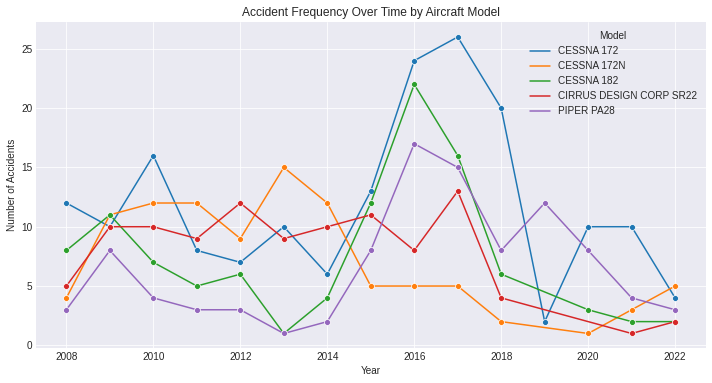

In [122]:
# accident trends by model
# Count accidents per model per year
model_trend = subset_aviation.groupby(['make_model', 'Year']).size().reset_index(name='accident_count')

# Filter to top most common models so the chart is not crowded
top_models = subset_aviation['make_model'].value_counts().head(5).index
model_trend_filtered = model_trend[model_trend['make_model'].isin(top_models)]

# plot the line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=model_trend_filtered, x='Year', y='accident_count', hue='make_model', marker='o')
plt.title("Accident Frequency Over Time by Aircraft Model")
plt.ylabel("Number of Accidents")
plt.xlabel("Year")
plt.legend(title="Model")
plt.show()

# Conclusions & Next Steps

From the data, a few clear patterns stood out:

**1. Some aircraft models are much safer than others.**  
Models with very low or zero fatal accidents should be the top choices for purchase.

**2. Engine setup matters.**  
Aircraft with engines like Electric and Geared turbofan types tend to have fewer severe accidents.

**3. Accident severity changes depending on flight purpose.**  
Commercial, private, and training flights don’t all carry the same level of risk. Some flight types may require stricter rules or better equipment.


## What to Do Next

**Create a shortlist of the safest aircraft models and engine types.**  
These should be reviewed further for pricing, availability, and maintenance costs.

**Set different safety procedures depending on the type of operation.**  
For example, commercial flights may need more experienced pilots or better-equipped aircraft.

**Check how accident trends have changed over the years for top models**  
If a model keeps improving, it's a strong long-term choice.


These findings give Company X a clear starting point for choosing aircraft that are both safe and practical to operate.
